In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

什么是variance bias tradeoff？

我们首先来看一下数据，假设我们有一个函数能够完美的表示数据的关系

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

我们可以从里面sample一些数据

In [3]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_line = np.linspace(0, 1, 100)


我们来把这个数据画出来

(-2.0, 2.0)

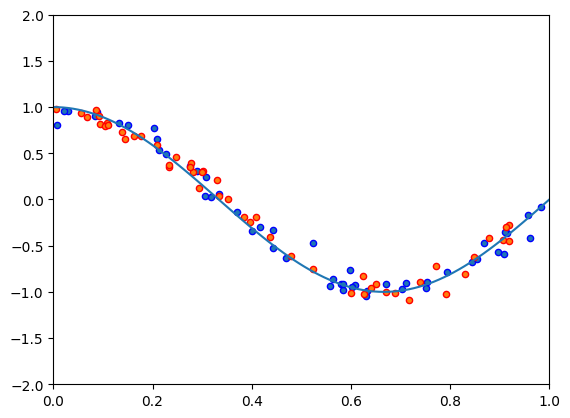

In [4]:
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Samples")
plt.plot(X_line, true_fun(X_line), label="True function")
plt.xlim((0, 1))
plt.ylim((-2, 2))

对于这个数据我们可以训练一个模型，假设我们使用简单的线性回归

In [5]:
def model(degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    return pipeline.fit(X[:, np.newaxis], y)

(-2.0, 2.0)

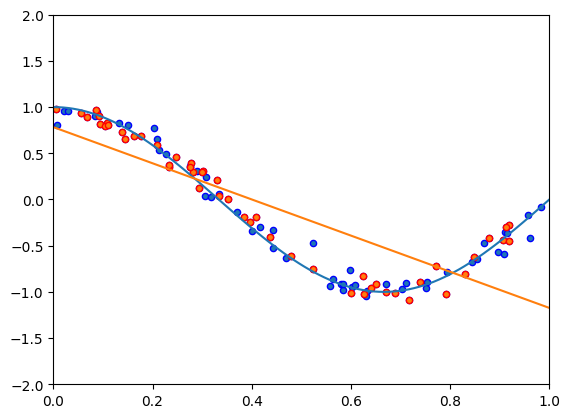

In [6]:
pipeline1 = model(1)

plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Samples")
plt.plot(X_line, true_fun(X_line), label="True function")
plt.plot(X_line, pipeline1.predict(X_line[:, np.newaxis]), label="Model")
plt.xlim((0, 1))
plt.ylim((-2, 2))

(-2.0, 2.0)

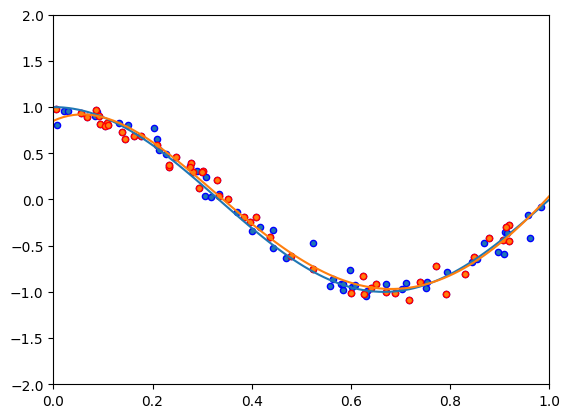

In [7]:
pipeline2 = model(4)
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Samples")
plt.plot(X_line, true_fun(X_line), label="True function")
plt.plot(X_line, pipeline2.predict(X_line[:, np.newaxis]), label="Model")
plt.xlim((0, 1))
plt.ylim((-2, 2))

(-2.0, 2.0)

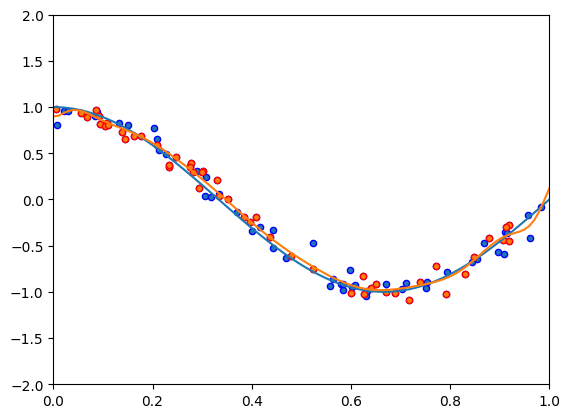

In [8]:
pipeline3 = model(15)
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Samples")
plt.plot(X_line, true_fun(X_line), label="True function")
plt.plot(X_line, pipeline3.predict(X_line[:, np.newaxis]), label="Model")
plt.xlim((0, 1))
plt.ylim((-2, 2))

计算每个模型的variance 和bias

In [9]:
# Initialize variables to store bias and variance calculations
def eval(pipeline):
    n_runs = 100
    y_preds = np.zeros((n_runs, len(y_test)))
    avg_pred = np.zeros(len(y_test))
    
    # Fit multiple models and make predictions
    for i in range(n_runs):
        pipeline.fit(X_train[:,np.newaxis], y_train)
        y_preds[i] = pipeline.predict(X_test[:,np.newaxis])
    
    # Calculate average predictions
    avg_pred = np.mean(y_preds, axis=0)
    
    # Calculate bias
    bias = np.mean((avg_pred - y_test) ** 2)
    
    # Calculate variance
    variance = np.mean(np.var(y_preds, axis=0))
    
    # Output the results
    print(f'Bias: {bias}')
    print(f'Variance: {variance}')


In [10]:
eval(pipeline1) # simple model 
eval(pipeline2) # good model 
eval(pipeline3) # overfit model

Bias: 0.12493667707818845
Variance: 5.542857676308061e-31
Bias: 0.009069903854247576
Variance: 8.489036971672283e-31
Bias: 0.00994083000466222
Variance: 1.0358883836078963e-30
